<a href="https://colab.research.google.com/github/irma3111111/UTS_Prak.PembelajaranMesin_060/blob/main/naive_bayes_classification_with_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
# 2. Load Dataset
data = pd.read_csv('citrus.csv')

In [4]:
# 3. Eksplorasi Data
print('Sample Data:')
print(data.head())
print('\nCek Missing Values:')
print(data.isnull().sum())
print('\nDistribusi Label:')
print(data['name'].value_counts())

Sample Data:
     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9

Cek Missing Values:
name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

Distribusi Label:
name
orange        5000
grapefruit    5000
Name: count, dtype: int64


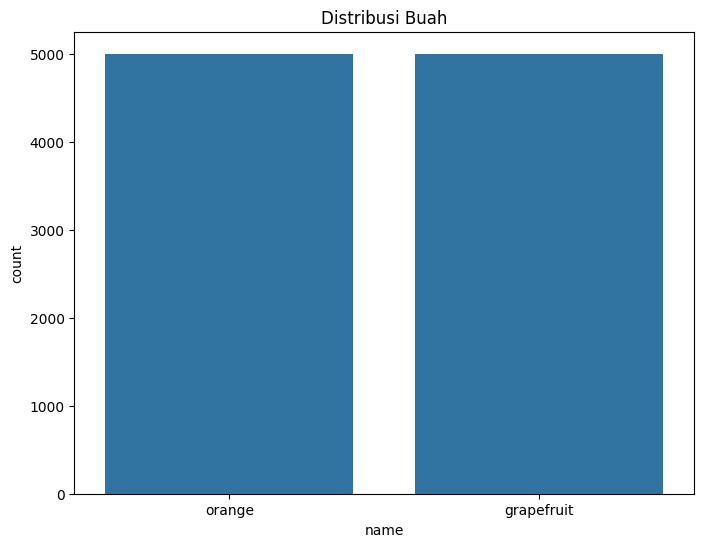

In [7]:
# 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,6))
sns.countplot(x='name', data=data)
plt.title('Distribusi Buah')
plt.show()

<Figure size 1000x600 with 0 Axes>

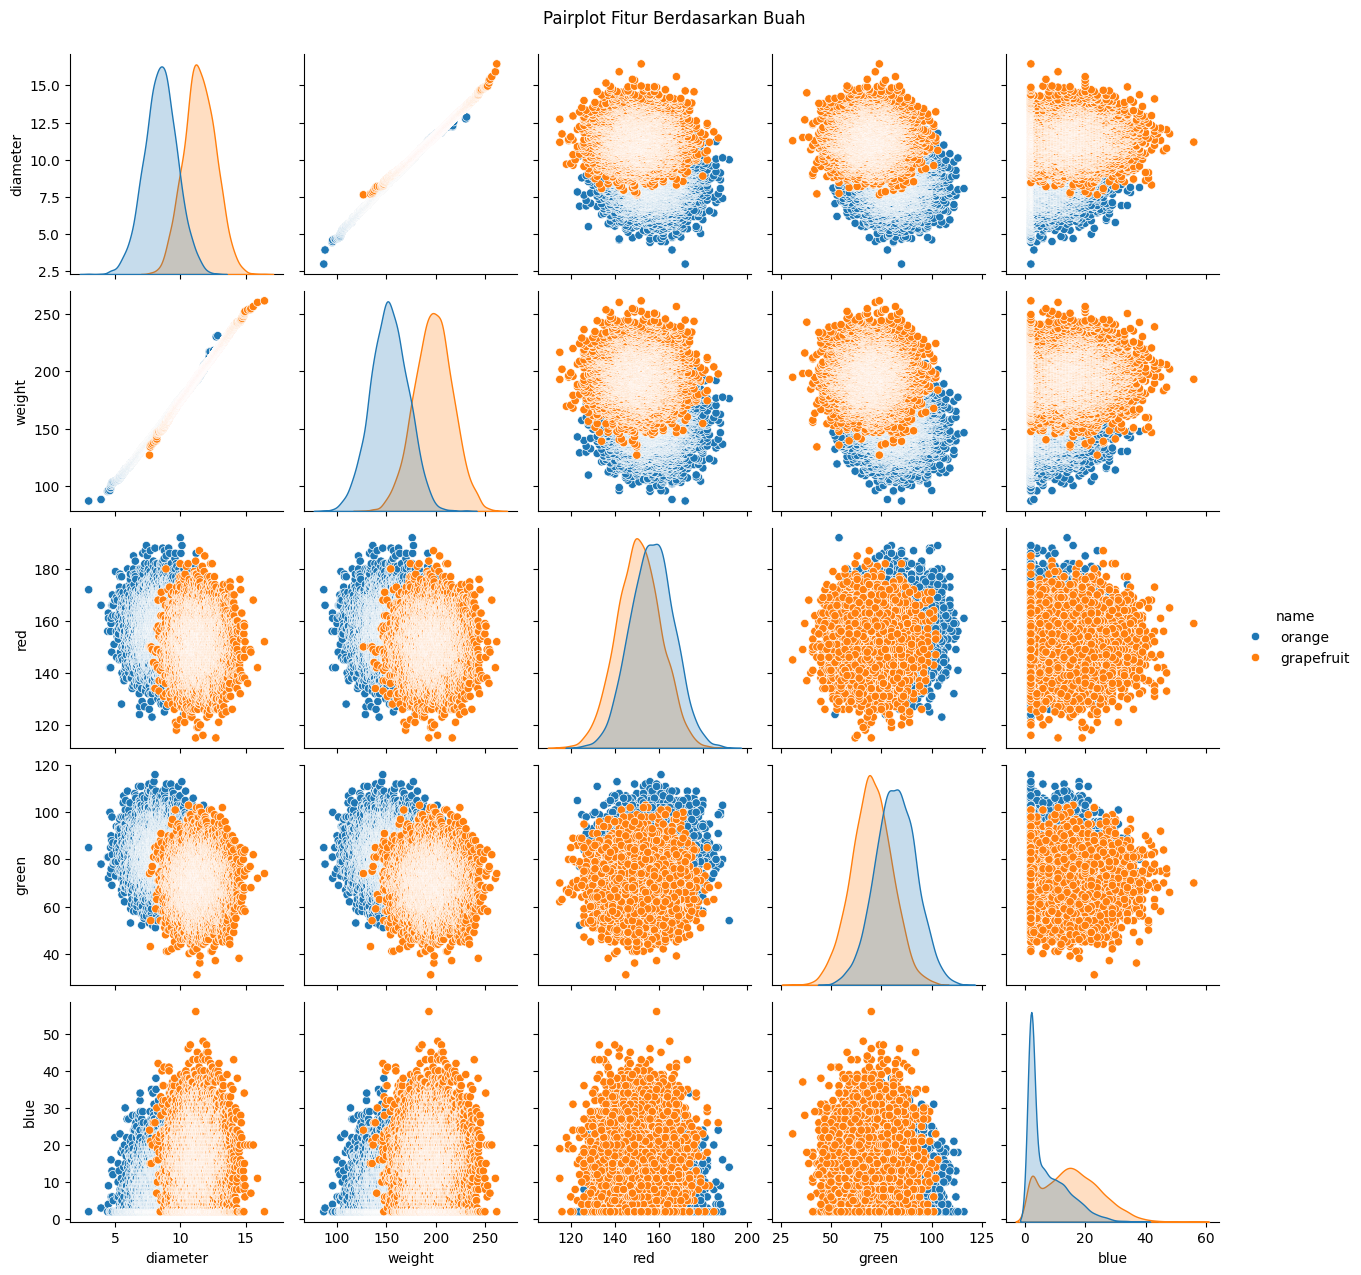

In [8]:
plt.figure(figsize=(10,6))
sns.pairplot(data[['diameter', 'weight', 'red', 'green', 'blue', 'name']], hue='name')
plt.suptitle('Pairplot Fitur Berdasarkan Buah', y=1.02)
plt.show()

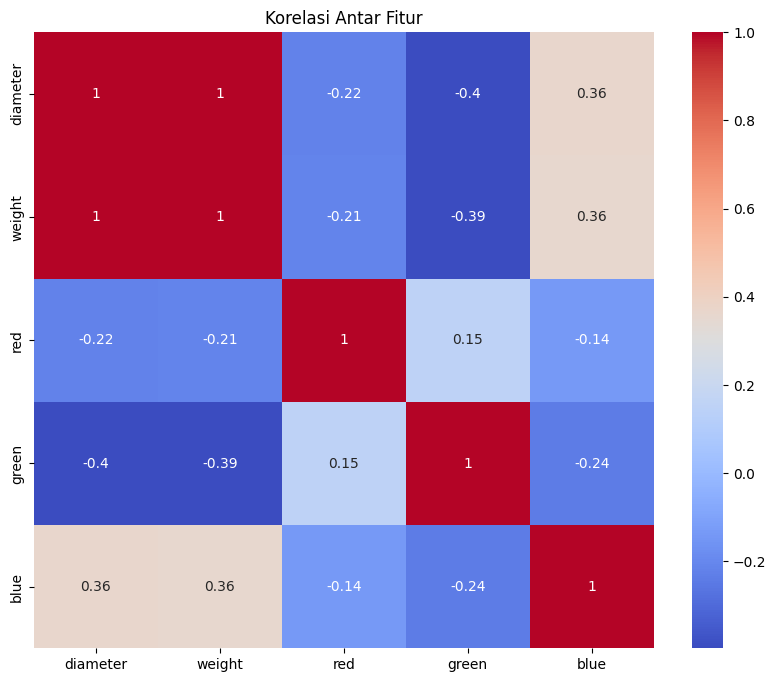

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data[['diameter', 'weight', 'red', 'green', 'blue']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

In [11]:
# 5. Preprocessing
# Pilih fitur dan label
features = data[['diameter', 'weight', 'red', 'green', 'blue']]
labels = data['name'].map({'orange': 0, 'grapefruit': 1})

In [12]:
# Hapus data selain orange dan grapefruit
mask = labels.notnull()
features = features[mask]
labels = labels[mask]

In [13]:
# Normalisasi Fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [14]:
# 6. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

In [15]:
# 7. Buat dan Latih Model
model = GaussianNB()

In [16]:
# 8. Cross-Validation
cv_scores = cross_val_score(model, features_scaled, labels, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores}")
print(f"Average Accuracy: {cv_scores.mean() * 100:.2f}%")

Cross-Validation Accuracy: [0.6335 0.985  0.9975 0.987  0.6175]
Average Accuracy: 84.41%


In [17]:
# 9. Latih model pada training set untuk evaluasi lebih lanjut
model.fit(X_train, y_train)

GaussianNB()

In [18]:
# 10. Prediksi dan Evaluasi
y_pred = model.predict(X_test)

print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print(f'\nAkurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%')


Confusion Matrix:
[[921  91]
 [ 69 919]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1012
           1       0.91      0.93      0.92       988

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000


Akurasi: 92.00%


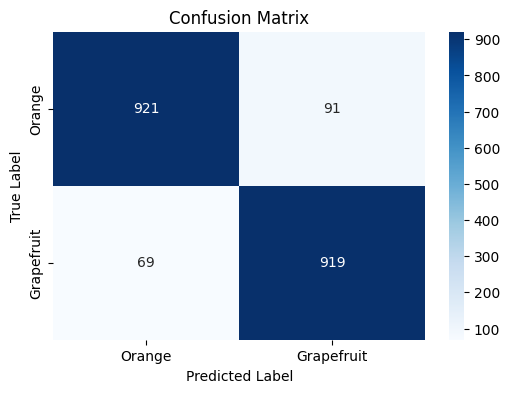

In [19]:
# 11. Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Orange', 'Grapefruit'], yticklabels=['Orange', 'Grapefruit'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Kesimpulan Singkat:
Model Gaussian Naive Bayes memberikan performa klasifikasi yang baik dengan akurasi tinggi di atas
90
%
 dan metrik evaluasi seimbang antar kelas jeruk dan anggur meskipun terdapat variasi hasil cross-validation yang cukup lebar.

Jika ingin meningkatkan performa lebih lanjut dapat dilakukan analisis lebih mendalam terhadap distribusi data atau mencoba algoritma lain serta teknik feature engineering tambahan.